In [94]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/cassie/Desktop/Spring 2024/DS112/Capstone/spotify52kData.csv')

# Convert duration from milliseconds to seconds
data['duration'] = data['duration'] / 1000

# Display the first few rows of the dataset
print(data.head())

   songNumber                 artists  \
0           0             Gen Hoshino   
1           1            Ben Woodward   
2           2  Ingrid Michaelson;ZAYN   
3           3            Kina Grannis   
4           4        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration  explicit  danceability  \
0                      Comedy          73   230.666     False         0.676   
1            Ghost - Acoustic          55   149.610     False         0.420   
2              To Begin Again          57   210.826     False         0.438   
3  Can't Help Falling In Love          71   201.933     False         0.266   
4                    

In [95]:
# Check for missing values in each column
missing_data = data.isnull().sum()
print("Missing data in each column:\n", missing_data)

# It seems that there is no missing value, but I just want to make sure, so still do the drop.na
# Drop rows with any missing values
data = data.dropna()

# Display the new number of rows after dropping missing data
print("Number of rows after removing missing data:", data.shape[0])

Missing data in each column:
 songNumber          0
artists             0
album_name          0
track_name          0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
Number of rows after removing missing data: 52000


In [96]:
from sklearn.preprocessing import StandardScaler

# Standardizing 'popularity', 'duration', 'loudness' and 'tempo'
scaler = StandardScaler()
numerical_features = ['popularity', 'duration', 'danceability','energy','loudness','speechiness',
                      'acousticness','instrumentalness','liveness','valence','tempo']
data['popularity'] = scaler.fit_transform(data[['popularity']])
data['duration'] = scaler.fit_transform(data[['duration']])
data['loudness'] = scaler.fit_transform(data[['loudness']])
data['tempo'] = scaler.fit_transform(data[['tempo']])

# Display the first few rows of the dataset
print(data.head())

   songNumber                 artists  \
0           0             Gen Hoshino   
1           1            Ben Woodward   
2           2  Ingrid Michaelson;ZAYN   
3           3            Kina Grannis   
4           4        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration  explicit  danceability  \
0                      Comedy    1.834300  0.003112     False         0.676   
1            Ghost - Acoustic    1.006466 -0.685665     False         0.420   
2              To Begin Again    1.098447 -0.165479     False         0.438   
3  Can't Help Falling In Love    1.742318 -0.241048     False         0.266   
4                    

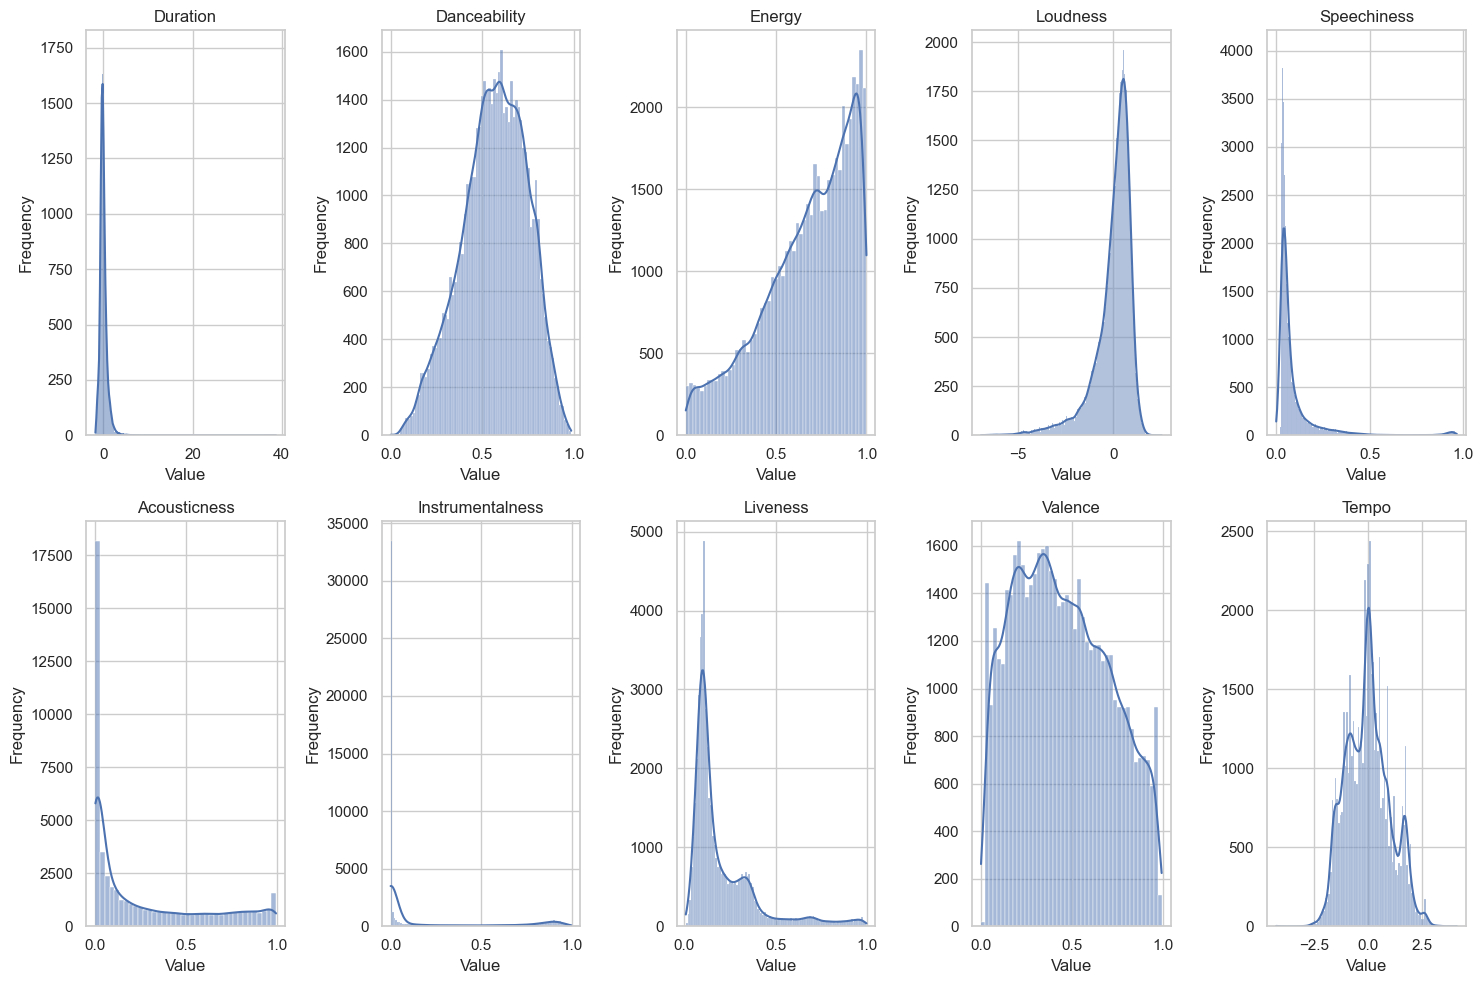

In [97]:
# Question 1
# Consider the 10 song features duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo. 
# Is any of these features reasonably distributed normally? If so, which one? 
# [Suggestion: Include a 2x5 figure with histograms for each feature)
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")

# Plot a histogram for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 5, i)
    sns.histplot(data[feature], kde=True)
    plt.title(feature.capitalize())
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

# Results dictionary to store the p-values
results_ks = {}

# Perform Kolmogorov-Smirnov test for each feature
for i, feature in enumerate(features, 1):
    # Normalize the feature to mean 0 and std 1 for the comparison
    normalized_data = (data[feature] - data[feature].mean()) / data[feature].std()
    
    # Perform the KS test against a standard normal distribution
    stat, p_value = kstest(normalized_data, 'norm')
    results_ks[feature] = p_value
    print(f"K-S test for {feature.capitalize()}:\nStatistic={stat:.3f}, p-value={p_value:.3f}\n")

# Output the results
print("Kolmogorov-Smirnov Test Results (p-values):")
for feature, p_val in results_ks.items():
    if p_val < 0.05:
        print(f"{feature.capitalize()}: Not normally distributed (p-value = {p_val:.3f})")
    else:
        print(f"{feature.capitalize()}: Normally distributed (p-value = {p_val:.3f})")

K-S test for Duration:
Statistic=0.135, p-value=0.000

K-S test for Danceability:
Statistic=0.032, p-value=0.000

K-S test for Energy:
Statistic=0.092, p-value=0.000

K-S test for Loudness:
Statistic=0.134, p-value=0.000

K-S test for Speechiness:
Statistic=0.291, p-value=0.000

K-S test for Acousticness:
Statistic=0.200, p-value=0.000

K-S test for Instrumentalness:
Statistic=0.366, p-value=0.000

K-S test for Liveness:
Statistic=0.200, p-value=0.000

K-S test for Valence:
Statistic=0.053, p-value=0.000

K-S test for Tempo:
Statistic=0.042, p-value=0.000

Kolmogorov-Smirnov Test Results (p-values):
Duration: Not normally distributed (p-value = 0.000)
Danceability: Not normally distributed (p-value = 0.000)
Energy: Not normally distributed (p-value = 0.000)
Loudness: Not normally distributed (p-value = 0.000)
Speechiness: Not normally distributed (p-value = 0.000)
Acousticness: Not normally distributed (p-value = 0.000)
Instrumentalness: Not normally distributed (p-value = 0.000)
Liven

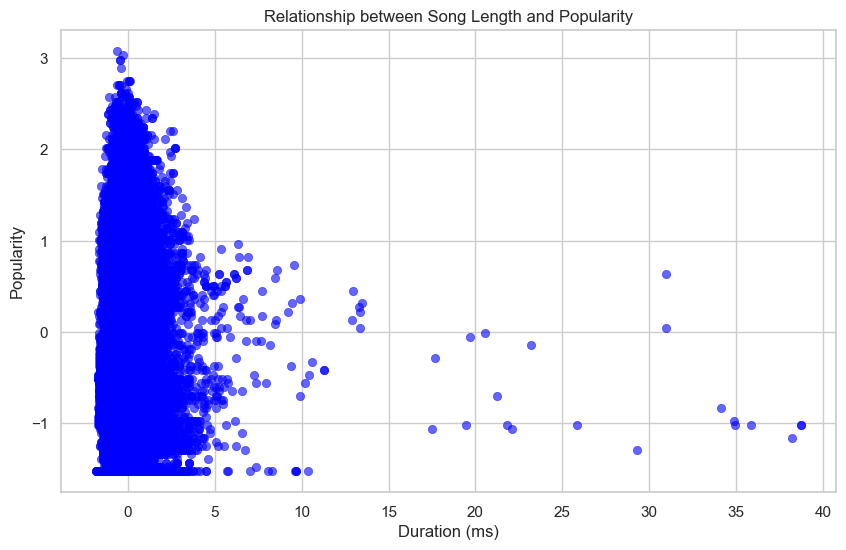

The Pearson correlation coefficient between song duration and popularity is: -0.055


In [99]:
# Question 2
# Is there a relationship between song length and popularity of a song? 
# If so, if the relationship positive or negative? 
# [Suggestion: Include a scatterplot]

# First deal with scatterplot
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='popularity', data=data, alpha=0.6, edgecolor=None, color='blue')
plt.title('Relationship between Song Length and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

correlation = data['duration'].corr(data['popularity'])
print(f"The Pearson correlation coefficient between song duration and popularity is: {correlation:.3f}")

U Statistic: 139361273.5
P-value: 1.5339599669557339e-19


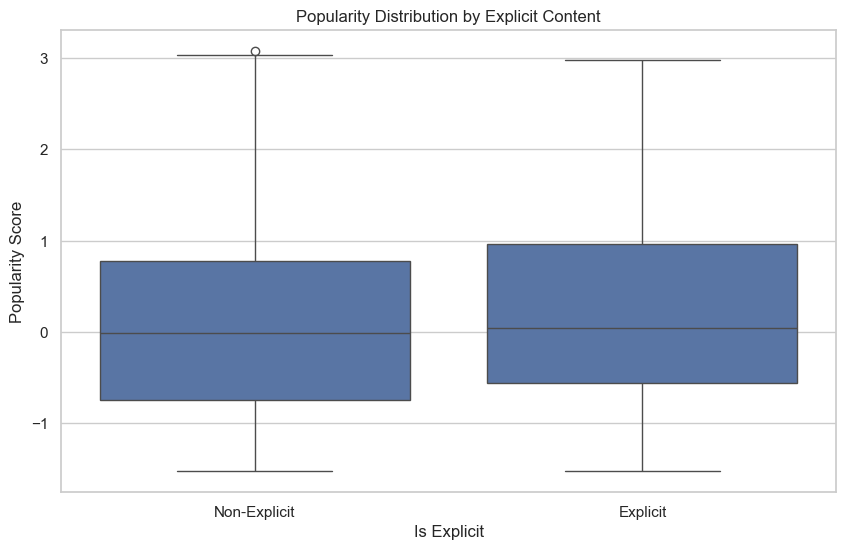

In [113]:
# Question 3
# Are explicitly rated songs more popular than songs that are not explicit? 
# [Suggestion: Do a suitable significance test, be it parametric, non-parametric or permutation]
import scipy.stats as stats

# Separate the data into two groups
explicit_songs = data[data['explicit'] == True]['popularity']
non_explicit_songs = data[data['explicit'] == False]['popularity']

# Perform the Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(explicit_songs, non_explicit_songs, alternative='greater')

print(f"U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['explicit'], y=data['popularity'])
plt.title('Popularity Distribution by Explicit Content')
plt.xlabel('Is Explicit')
plt.ylabel('Popularity Score')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.show()

U Statistic: 309702373.0
P-value: 0.9999989912386331


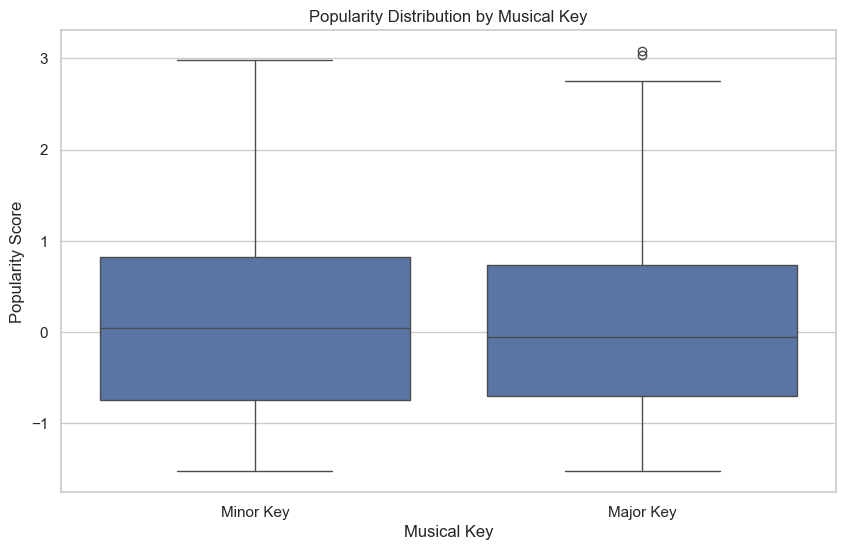

In [114]:
# Question 4
# Are songs in major key more popular than songs in minor key? 
# [Suggestion: Do a suitable significance test, be it parametric, non-parametric or permutation]
import pandas as pd
import scipy.stats as stats

# Separate the data into two groups based on the mode
major_key_songs = data[data['mode'] == 1]['popularity']
minor_key_songs = data[data['mode'] == 0]['popularity']

# Perform the Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(major_key_songs, minor_key_songs, alternative='greater')

print(f"U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['mode'], y=data['popularity'])
plt.title('Popularity Distribution by Musical Key')
plt.xlabel('Musical Key')
plt.ylabel('Popularity Score')
plt.xticks([0, 1], ['Minor Key', 'Major Key'])
plt.show()

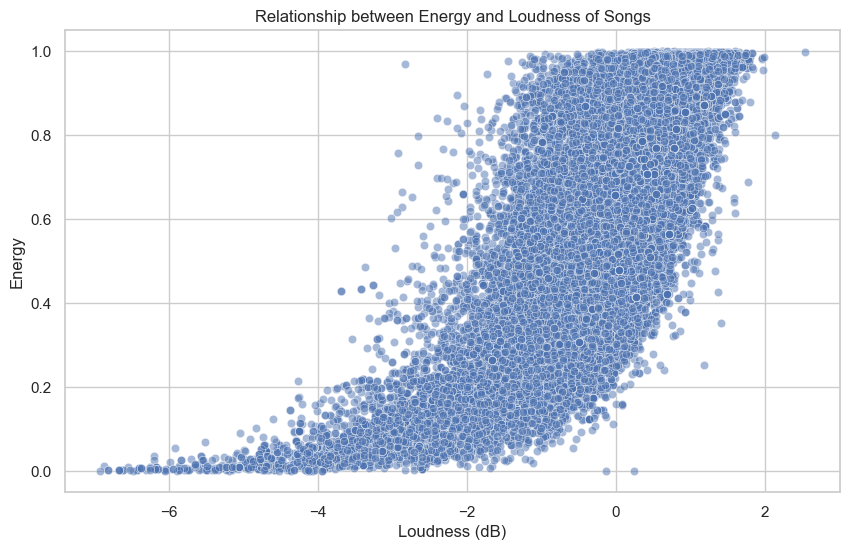

The Pearson correlation coefficient between energy and loudness is: 0.775


In [116]:
# Question 5
# Energy is believed to largely reflect the “loudness” of a song. 
# Can you substantiate (or refute) that this is the case? 
# [Suggestion: Include a scatterplot]
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='energy', data=data, alpha=0.5)
plt.title('Relationship between Energy and Loudness of Songs')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

correlation, _ = stats.pearsonr(data['loudness'], data['energy'])
print(f"The Pearson correlation coefficient between energy and loudness is: {correlation:.3f}")


Best predictor of popularity: instrumentalness
Coefficient of determination (R^2): 0.0210
Coefficient (Beta value) for instrumentalness: -0.4457
P-value for instrumentalness: 0.0000


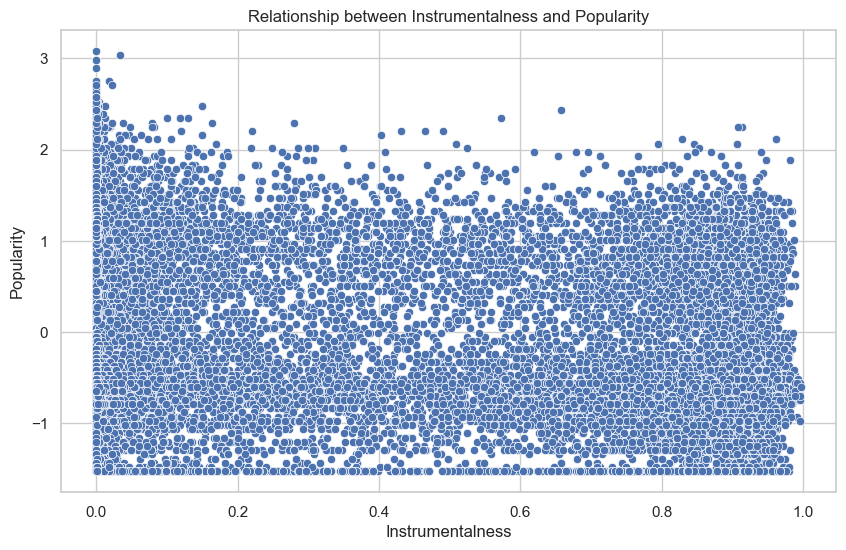

In [122]:
# Question 6
# Which of the 10 individual (single) song features fromquestion 1 predicts popularity best? How good is this “best” model?
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['popularity_standardized'] = scaler.fit_transform(data[['popularity']])


features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
import statsmodels.api as sm
results = []

for feature in features:
    # Prepare X and y
    X = sm.add_constant(data[feature])  # Adding a constant for the intercept
    y = data['popularity']
    
    # Create a model
    model = sm.OLS(y, X).fit()
    
    # Store results
    results.append((feature, model.rsquared, model.params.iloc[1], model.pvalues.iloc[1]))

# Sort results by the best predictor
results.sort(key=lambda x: x[1], reverse=True)  # Sort by R^2 value

best_feature, best_r_squared, best_coef, best_pvalue = results[0]

print(f"Best predictor of popularity: {best_feature}")
print(f"Coefficient of determination (R^2): {best_r_squared:.4f}")
print(f"Coefficient (Beta value) for {best_feature}: {best_coef:.4f}")
print(f"P-value for {best_feature}: {best_pvalue:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[best_feature], y=data['popularity'])
plt.title(f'Relationship between {best_feature.capitalize()} and Popularity')
plt.xlabel(best_feature.capitalize())
plt.ylabel('Popularity')
plt.show()


In [129]:
# Question 7
# Building a model that uses *all* of the song features from question 1,
# how well can you predict popularity now? 
# How much (if at all) is this model improved compared to the best model in question 6). 
# How do you account for this?
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = data[features]
y = data['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16091384)

# Create the model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate R² score for the test set
r2_test = r2_score(y_test, y_pred)

print(f"R² score for the testing set: {r2_test:.4f}")

# Evaluate performance on the training set for comparison
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"R² score for the training set: {r2_train:.4f}")


R² score for the testing set: 0.0517
R² score for the training set: 0.0466


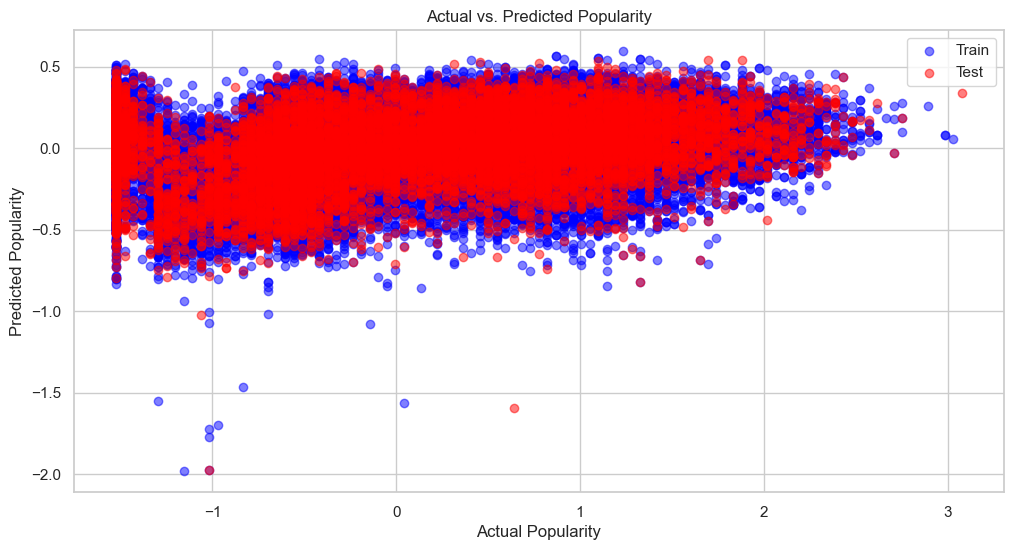

In [131]:
import matplotlib.pyplot as plt

# Generate predictions for both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plotting the results
plt.figure(figsize=(12, 6))

# Scatter plot for training data
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue', label='Train')
# Scatter plot for testing data
plt.scatter(y_test, y_test_pred, alpha=0.5, color='red', label='Test')

# Plot a line for perfect prediction
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Popularity')
plt.legend()
plt.grid(True)
plt.show()


Eigenvalues: [2.73388097 1.61735976 1.3845787  0.97958798 0.8752094  0.81483073
 0.67826859 0.47157203 0.31313367 0.13157818]
Number of components retained by Kaiser criterion: 3


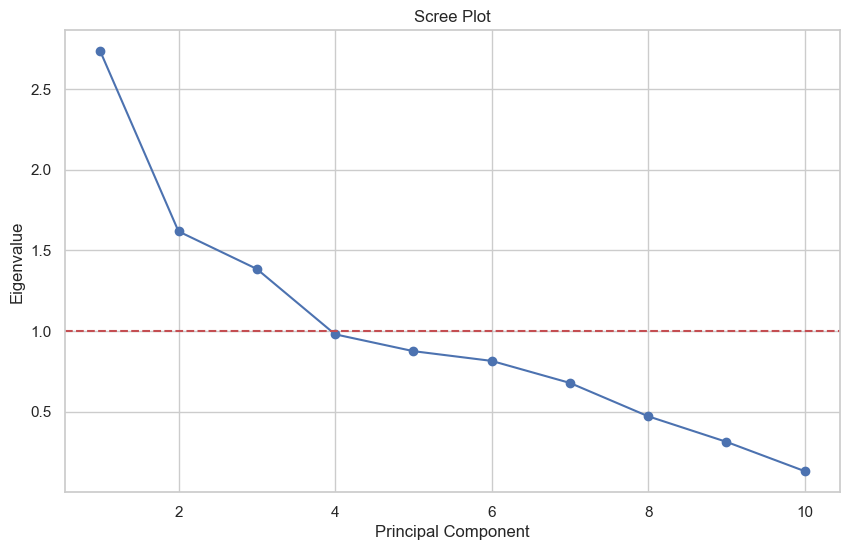

In [143]:
# Problem 8
# When considering the 10 song features above, 
# how many meaningful principal components can you extract? 
# What proportion of the variance do these principal components account for?
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the features
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate eigenvalues 
total_var = len(features) 
eigenvalues = explained_variance * total_var

# Apply the Kaiser criterion
components_retained_kaiser = eigenvalues[eigenvalues > 1]
num_components_retained_kaiser = len(components_retained_kaiser)

# Output the eigenvalues and the number of components retained
print("Eigenvalues:", eigenvalues)
print("Number of components retained by Kaiser criterion:", num_components_retained_kaiser)

# Plotting the scree plot to visualize eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), eigenvalues, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # Line for Kaiser criterion
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      3899
           1       0.63      1.00      0.77      6501

    accuracy                           0.63     10400
   macro avg       0.81      0.50      0.38     10400
weighted avg       0.77      0.63      0.48     10400

[[   0 3899]
 [   0 6501]]


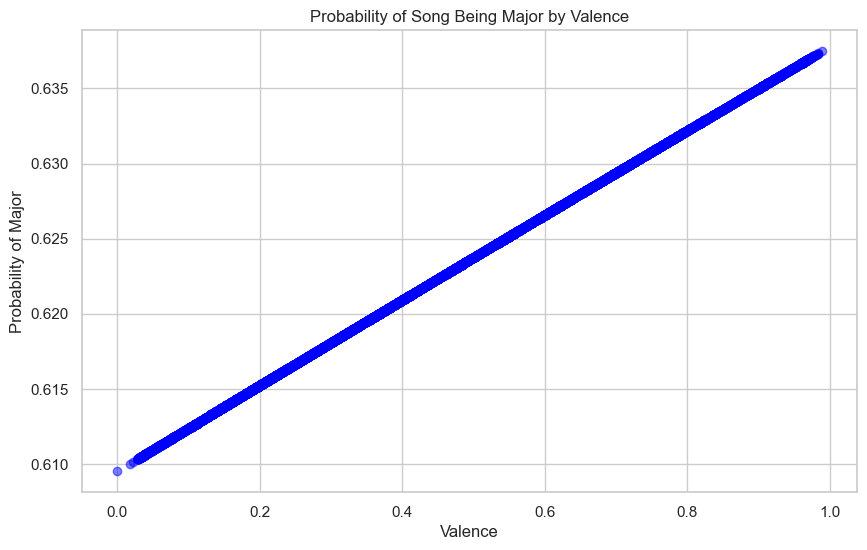

In [147]:
# Question 9
# Can you predict whether a song is in major or minor key from valence? 
# If so, how good is this prediction? 
# If not, is there a better predictor? 
# [Suggestion: It might be nice to show the logistic regression once you are done building the model]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = data[['valence']]  # Predictor
y = data['mode']  # Target: mode of the song

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16091384)

# Standardize the feature(s) for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities = model.predict_proba(X_test_scaled)[:, 1]  # Probability of 'major'

# Scatter plot of valence vs. probability of being major
plt.figure(figsize=(10, 6))
plt.scatter(X_test['valence'], probabilities, color='blue', alpha=0.5)
plt.title('Probability of Song Being Major by Valence')
plt.xlabel('Valence')
plt.ylabel('Probability of Major')
plt.grid(True)
plt.show()

In [154]:
# Question 10
# Which is a better predictor of whether a song is classical music
#  –duration or the principal components you extracted in question 8? 
# [Suggestion: You might have to convert the qualitative genre label to a binary numerical label (classical or not)]
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Convert genre to a binary label: 1 if classical, 0 otherwise
data['is_classical'] = (data['track_genre'] == 'classical').astype(int)

# Selecting and scaling 'duration'
duration_scaled = StandardScaler().fit_transform(data[['duration']])

# Standardize features before applying PCA
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X_scaled = StandardScaler().fit_transform(data[features])

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data for 'duration' model
X_train_dur, X_test_dur, y_train, y_test = train_test_split(duration_scaled, data['is_classical'], test_size=0.2, random_state=16091384)

# Split data for PCA model
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, data['is_classical'], test_size=0.2, random_state=16091384)

# Logistic regression for 'duration'
model_dur = LogisticRegression()
model_dur.fit(X_train_dur, y_train)
print("Duration Model Performance:")
print(classification_report(y_test, model_dur.predict(X_test_dur), zero_division=1))

# Logistic regression for PCA components
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)
print("PCA Model Performance:")
print(classification_report(y_test, model_pca.predict(X_test_pca), zero_division=1))


Duration Model Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10189
           1       1.00      0.00      0.00       211

    accuracy                           0.98     10400
   macro avg       0.99      0.50      0.49     10400
weighted avg       0.98      0.98      0.97     10400

PCA Model Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10189
           1       0.32      0.06      0.10       211

    accuracy                           0.98     10400
   macro avg       0.65      0.53      0.54     10400
weighted avg       0.97      0.98      0.97     10400



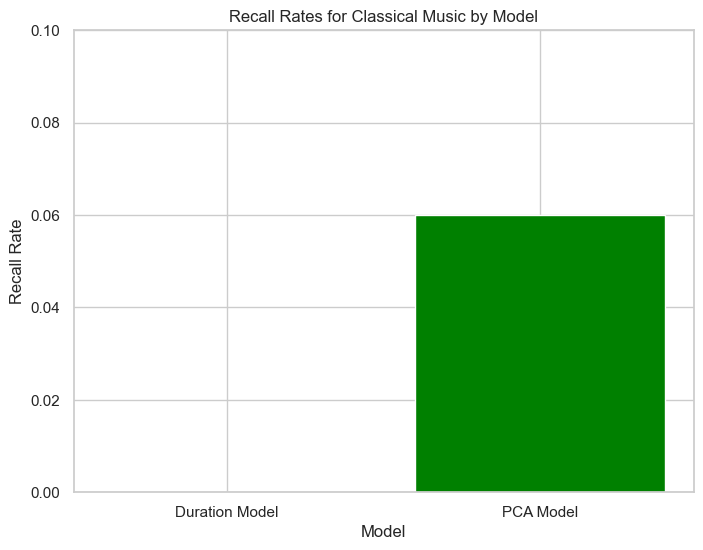

In [155]:
import matplotlib.pyplot as plt

# Recall rates from the classification reports
recall_duration = 0.00  # Recall for classical songs using duration model
recall_pca = 0.06       # Recall for classical songs using PCA model

# Labels for the bar chart
labels = ['Duration Model', 'PCA Model']

# Recall values
recalls = [recall_duration, recall_pca]

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, recalls, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Recall Rate')
plt.title('Recall Rates for Classical Music by Model')
plt.ylim(0, 0.10)  # Adjusting the y-axis limit to better visualize small recall rates
plt.show()

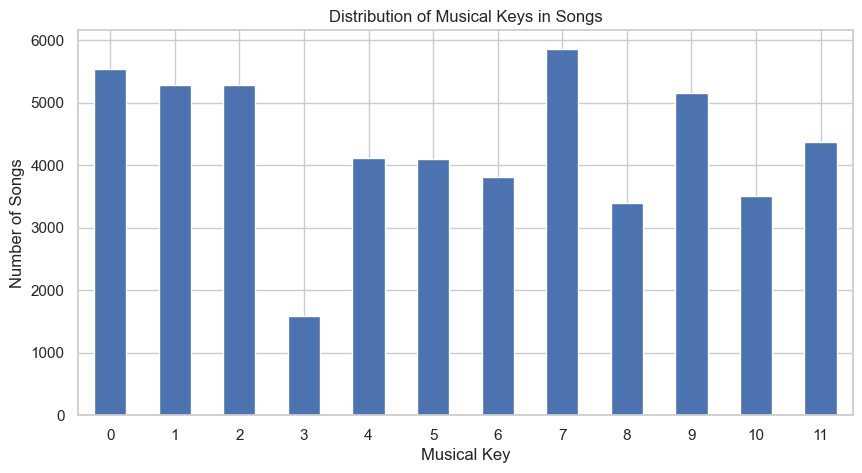

In [157]:
# Extra Credit
import pandas as pd
import matplotlib.pyplot as plt


# Analyze the distribution of keys
key_distribution = data['key'].value_counts().sort_index()

# Plot the distribution of musical keys
plt.figure(figsize=(10, 5))
key_distribution.plot(kind='bar')
plt.title('Distribution of Musical Keys in Songs')
plt.xlabel('Musical Key')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.show()


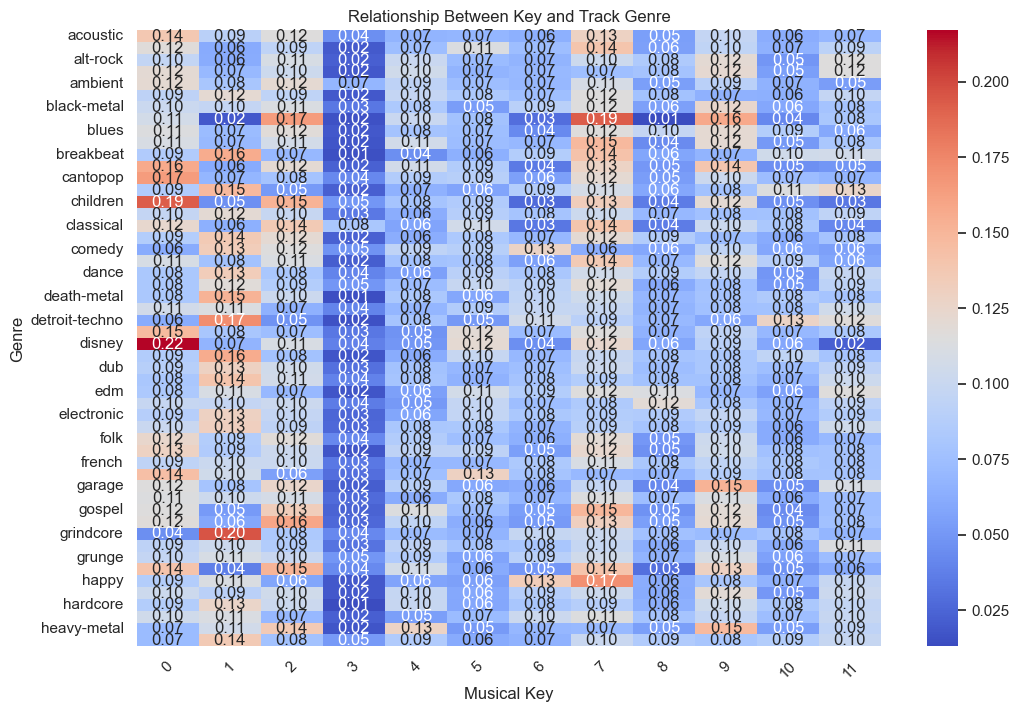

In [158]:
## Extra Credit
## I was wondering what is the relationship betweeen key and track genre.
## I was thinking that maybe some kinds of genre would have their *prefer* key.
## So I made a plot about this.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab of genres and keys
genre_key_matrix = pd.crosstab(data['track_genre'], data['key'])

# Normalize the crosstab by row to see the proportion of each key in each genre
genre_key_matrix_normalized = genre_key_matrix.div(genre_key_matrix.sum(axis=1), axis=0)

# Plotting the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(genre_key_matrix_normalized, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Relationship Between Key and Track Genre')
plt.xlabel('Musical Key')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
